In [18]:
import meep as mp
import numpy as np
from matplotlib import pyplot as plt 

In [19]:
# load geometry
exec(open('gmod_s.py').read())
# load source
exec(open('smod.py').read())

In [13]:
sim_vac = mp.Simulation(cell_size=cell_size,
                        boundary_layers=pml_layers,
                        sources=sources,
                        dimensions=dimensions,
                        resolution=resolution)

refl_fr = mp.FluxRegion(center=mp.Vector3(z=-2))
refl = sim_vac.add_flux(fcen, df, Nf, refl_fr)
tran_fr = mp.FluxRegion(center=mp.Vector3(z= 2 ))
tran = sim_vac.add_flux(fcen, df, Nf, tran_fr)
   
sim_vac.run(until_after_sources=mp.stop_when_fields_decayed(50, mp.Ex,
                                                        mp.Vector3(z=0), 1e-3))

empty_flux = mp.get_fluxes(tran)
empty_data = sim_vac.get_flux_data(refl)


-----------
Initializing structure...
time for choose_chunkdivision = 0.000439882 s
Working in 1D dimensions.
Computational cell is 0 x 0 x 8 with resolution 1000
time for set_epsilon = 0.00219011 s
-----------
on time step 67881 (time=33.9405), 5.89288e-05 s/step
field decay(t = 50.0005): 0.25000730730087717 / 0.25000730730087717 = 1.0
on time step 135820 (time=67.91), 5.88765e-05 s/step
field decay(t = 100.0005): 8.875469386219327e-17 / 0.25000730730087717 = 3.550083988360362e-16
run 0 finished at t = 100.0005 (200001 timesteps)


In [14]:
#sim.reset_meep()

# add a block with n=3.5 for the air-dielectric interface
geometry = [mp.Block(mp.Vector3(mp.inf,mp.inf,d), center=mp.Vector3(z=0),
                     material= mp.Medium(epsilon=epsi))]

sim = mp.Simulation(cell_size=cell_size,
                        geometry=geometry,
                        boundary_layers=pml_layers,
                        sources=sources,
                        dimensions=dimensions,
                        resolution=resolution)
tran = sim.add_flux(fcen, df, Nf, tran_fr)
refl = sim.add_flux(fcen, df, Nf, refl_fr)
sim.load_minus_flux_data(refl, empty_data)

sim.run(until_after_sources=mp.stop_when_fields_decayed(50, mp.Ex, mp.Vector3(z=0), 1e-3))

refl_flux = mp.get_fluxes(refl)
tran_flux = mp.get_fluxes(tran)
freqs = mp.get_flux_freqs(refl)

wvls = np.empty(Nf)
R = np.empty(Nf)
T = np.empty(Nf)
for i in range(Nf):
        wvls[i] = 1/freqs[i]
        R[i] = -refl_flux[i]/empty_flux[i]
        T[i] = tran_flux[i]/empty_flux[i]

-----------
Initializing structure...
time for choose_chunkdivision = 0.000449896 s
Working in 1D dimensions.
Computational cell is 0 x 0 x 8 with resolution 1000
     block, center = (0,0,0)
          size (1e+20,1e+20,0.5)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12,12,12)
time for set_epsilon = 0.00369596 s
-----------
on time step 68901 (time=34.4505), 5.80555e-05 s/step
field decay(t = 50.0005): 0.05004973264502444 / 0.05004973264502444 = 1.0
on time step 137590 (time=68.795), 5.82341e-05 s/step
field decay(t = 100.0005): 1.9333658196335253e-15 / 0.05004973264502444 = 3.8628894051159844e-14
run 0 finished at t = 100.0005 (200001 timesteps)


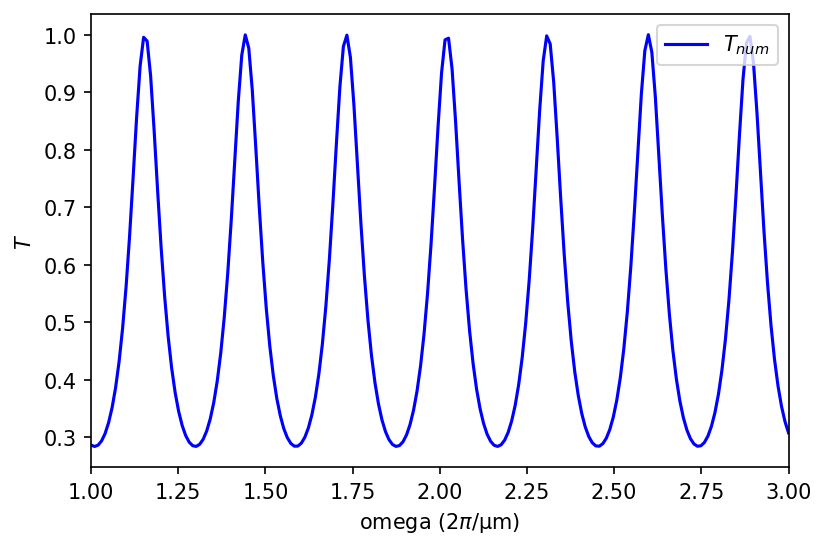

In [21]:
## compare numerical and analytical
plt.figure(dpi=150)
plt.plot(omega/2/np.pi,T,'b-',label='$T_{num}$')
plt.xlabel("omega ($2\pi$/μm)")
plt.ylabel("$T$")
plt.legend(loc="upper right")
plt.xlim([fmin,fmax])
plt.show()